<a href="https://colab.research.google.com/github/slashgohu/Challenge-1-Data-Science/blob/main/AluraStoreBr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importação dos dados



In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

try:
    loja = pd.read_csv(url)
    loja2 = pd.read_csv(url2)
    loja3 = pd.read_csv(url3)
    loja4 = pd.read_csv(url4)

    print("✅ Dados carregados com sucesso!")

except Exception as e:
    print(f"❌ Erro ao carregar os dados: {e}")

print(type(loja))
print(loja.head())


✅ Dados carregados com sucesso!
<class 'pandas.core.frame.DataFrame'>
                 Produto Categoria do Produto    Preço      Frete  \
0     Assistente virtual          eletronicos   219.08   9.249790   
1         Mesa de jantar               moveis   256.35  11.234305   
2      Jogo de tabuleiro           brinquedos   279.51  21.262681   
3            Micro-ondas     eletrodomesticos  1009.99  54.667344   
4  Cadeira de escritório               moveis   446.99  26.964689   

  Data da Compra        Vendedor Local da compra  Avaliação da compra  \
0     16/01/2021     Pedro Gomes              SP                    4   
1     18/05/2022  Beatriz Moraes              RJ                    1   
2     15/03/2021      João Souza              DF                    1   
3     03/05/2022      João Souza              RS                    4   
4     07/11/2020   Larissa Alves              MG                    5   

  Tipo de pagamento  Quantidade de parcelas    lat    lon  
0    cartao_cred

# IMPORTS

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#1. Análise do faturamento


In [ ]:
# Analise do faturamento total das lojas
loja1_faturamento = loja['Preço'].sum()
loja2_faturamento = loja2['Preço'].sum()
loja3_faturamento = loja3['Preço'].sum()
loja4_faturamento = loja4['Preço'].sum()

In [ ]:
lojas = {
    "Loja 1": loja1_faturamento,
    "Loja 2": loja2_faturamento,
    "Loja 3": loja3_faturamento,
    "Loja 4": loja4_faturamento
}

for nome, faturamento in lojas.items():
    print(f"{nome}: R${faturamento:.2f}")


Loja 1: R$1534509.12
Loja 2: R$1488459.06
Loja 3: R$1464025.03
Loja 4: R$1384497.58


**Grafico do faturamento:**

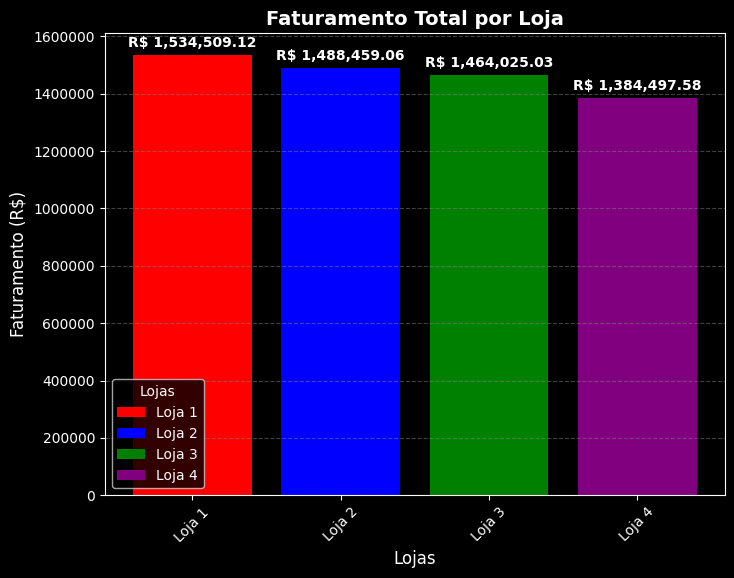

In [ ]:
# Dark mode
plt.style.use('dark_background')

# Dados do faturamento das lojas
lojas = ["Loja 1", "Loja 2", "Loja 3", "Loja 4"]
faturamento = [loja1_faturamento, loja2_faturamento, loja3_faturamento, loja4_faturamento]
cores = ['red', 'blue', 'green', 'purple']

# Grafico
plt.figure(figsize=(8, 6))  # Tamanho do grafico
plt.bar(lojas, faturamento, color=cores, label=["Loja 1", "Loja 2", "Loja 3", "Loja 4"]) # Nomes legenda

# Titulos
plt.title("Faturamento Total por Loja", fontsize=14, fontweight='bold')
plt.xlabel("Lojas", fontsize=12)
plt.ylabel("Faturamento (R$)", fontsize=12)

# Formatacao de valores
for i, valor in enumerate(faturamento):
    plt.text(i, valor + (valor * 0.02), f"R$ {valor:,.2f}", ha='center', fontsize=10, fontweight='bold', color='white')

# Mudancas esteticas
plt.xticks(rotation=45)  # Rotacao dos nomes
plt.grid(axis='y', linestyle='--', alpha=0.5, color='gray')  # Linha no eixo Y para melhor compreensao
plt.legend(title="Lojas", fontsize=10) # Titulo legenda
plt.ticklabel_format(style='plain', axis='y') # Formatação do eixo Y

plt.show()


Grafico pizza de participacao

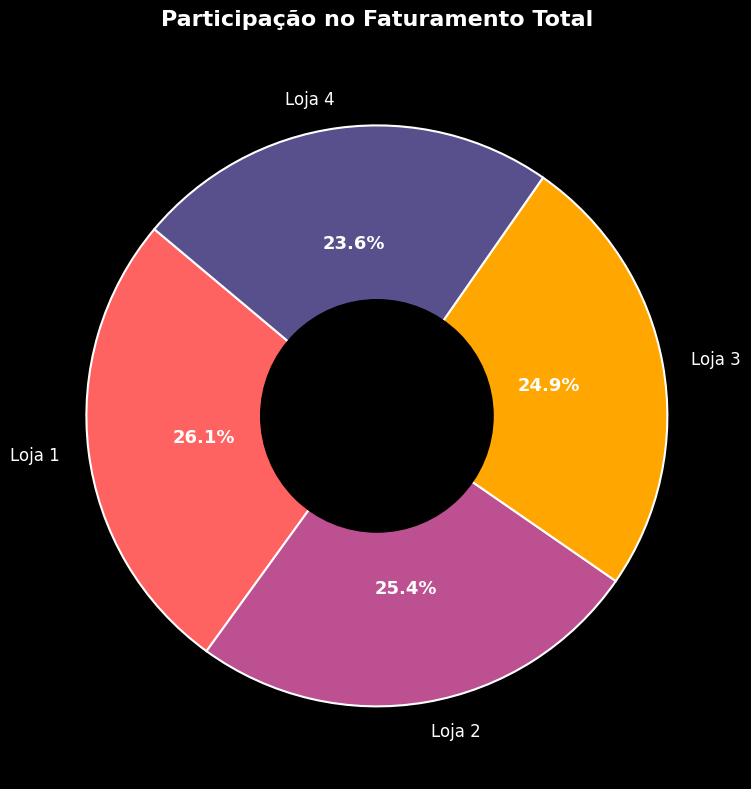

In [ ]:
# Dark mode
plt.style.use('dark_background')

# Dados do faturamento das lojas
lojas = ["Loja 1", "Loja 2", "Loja 3", "Loja 4"]
faturamento = [loja1_faturamento, loja2_faturamento, loja3_faturamento, loja4_faturamento]
cores = ['#ff6361', '#bc5090', '#ffa600', '#58508d']

# Grafico
fig, ax = plt.subplots(figsize=(8, 8)) # Tamanho do grafico
wedges, texts, autotexts = ax.pie(faturamento, labels=lojas, autopct="%1.1f%%", startangle=140, colors=cores,
                                  wedgeprops={'edgecolor': 'white', 'linewidth': 1.5},
                                  textprops={'fontsize': 12, 'color': 'white'})

# Texto dentro do grafico
for autotext in autotexts:
    autotext.set_fontsize(13)
    autotext.set_fontweight("bold")

# Efeito de grafico de rosca
plt.gca().add_patch(plt.Circle((0, 0), 0.4, color='black', fc='black'))

# Titulo
plt.title("Participação no Faturamento Total", fontsize=16, fontweight='bold', pad=20)

# Melhora do layout
plt.tight_layout()

plt.show()

# 2. Vendas por Categoria


In [ ]:
# Faturamento por categoria
categoria_vendas = pd.DataFrame({
    "Loja 1": loja.groupby('Categoria do Produto')['Preço'].sum(),
    "Loja 2": loja2.groupby('Categoria do Produto')['Preço'].sum(),
    "Loja 3": loja3.groupby('Categoria do Produto')['Preço'].sum(),
    "Loja 4": loja4.groupby('Categoria do Produto')['Preço'].sum()
    })
# Formatacao de cada coluna usando .map()
categoria_vendas["Loja 1"] = categoria_vendas["Loja 1"].map(lambda x: f"R$ {x:,.2f}")
categoria_vendas["Loja 2"] = categoria_vendas["Loja 2"].map(lambda x: f"R$ {x:,.2f}")
categoria_vendas["Loja 3"] = categoria_vendas["Loja 3"].map(lambda x: f"R$ {x:,.2f}")
categoria_vendas["Loja 4"] = categoria_vendas["Loja 4"].map(lambda x: f"R$ {x:,.2f}")

print("🧾 Faturamento por Categoria de Produto:")
print(categoria_vendas.head())

🧾 Faturamento por Categoria de Produto:
                              Loja 1         Loja 2         Loja 3  \
Categoria do Produto                                                 
brinquedos              R$ 23,993.78   R$ 21,262.21   R$ 25,869.20   
eletrodomesticos       R$ 484,913.36  R$ 464,758.13  R$ 438,984.89   
eletronicos            R$ 572,659.23  R$ 547,773.71  R$ 547,699.92   
esporte e lazer         R$ 52,387.55   R$ 46,326.09   R$ 47,456.10   
instrumentos musicais  R$ 121,731.69  R$ 139,987.03  R$ 103,174.45   

                              Loja 4  
Categoria do Produto                  
brinquedos              R$ 27,015.67  
eletrodomesticos       R$ 377,680.65  
eletronicos            R$ 545,966.86  
esporte e lazer         R$ 44,465.65  
instrumentos musicais  R$ 100,136.50  


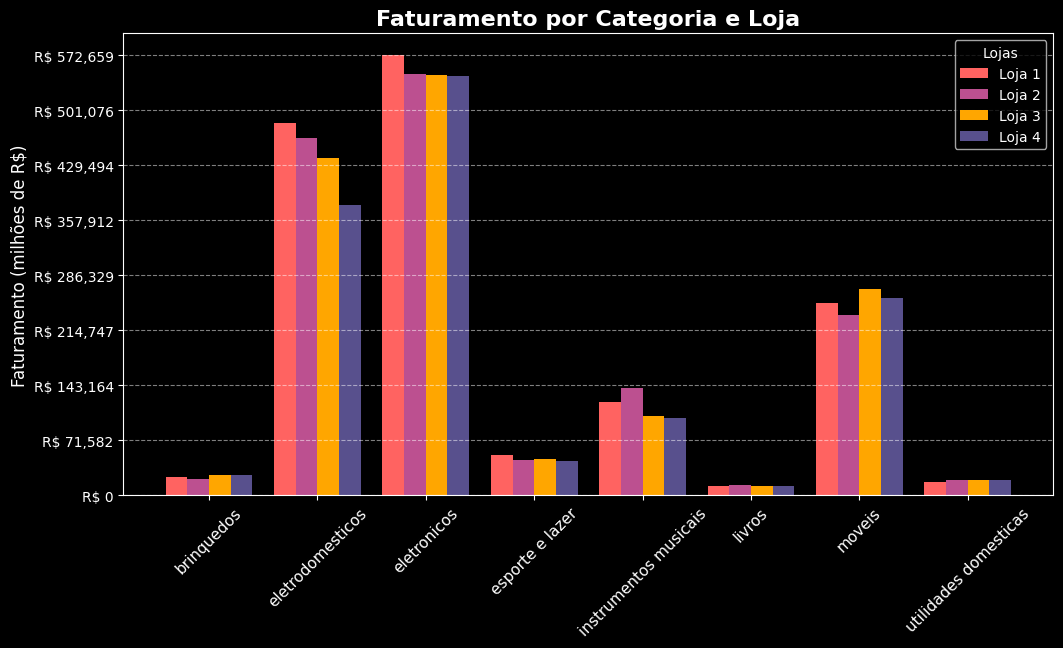

In [ ]:
# Dark mode
plt.style.use('dark_background')

# Dados
categorias = categoria_vendas.index
cores = ['#ff6361', '#bc5090', '#ffa600', '#58508d']

# Remocao da formatacao de moeda para permitir calculos
categoria_vendas_num = categoria_vendas.replace({"R\$ ": "", ",": ""}, regex=True).astype(float)

# Grafico
fig, ax = plt.subplots(figsize=(12, 6))
width = 0.2  # Largura das barras
pos = range(len(categorias))  # Posicoes das barras no eixo X

# Barras individuais para cada loja
for i, loja in enumerate(lojas):
    ax.bar([p + width * i for p in pos], categoria_vendas_num[loja], width=width, color=cores[i], label=loja)

# Mudancas esteticas
ax.set_xticks([p + width * 1.5 for p in pos])  # Posição dos rótulos no eixo X
ax.set_xticklabels(categorias, rotation=45, fontsize=11)  # Rotacao dos nomes
ax.set_ylabel("Faturamento (milhões de R$)", fontsize=12)  # Legenda
ax.set_title("Faturamento por Categoria e Loja", fontsize=16, fontweight='bold')
ax.legend(title="Lojas")
ax.grid(axis='y', linestyle='--', alpha=0.5)

# Valores aproximados do eixo Y
max_value = categoria_vendas_num.max().max()  # Valor maximo
intervalo = max_value / 8  # Intervalos
valores_y = np.arange(0, max_value + intervalo, intervalo)
ax.set_yticks(valores_y)
ax.set_yticklabels([f"R$ {int(y):,}" for y in valores_y])

plt.show()

# 3. Média de Avaliação das Lojas

In [ ]:
lojas = {
    "Loja 1": loja if isinstance(loja, pd.DataFrame) and "Avaliação da compra" in loja.columns and not loja["Avaliação da compra"].isna().all() else None,
    "Loja 2": loja2 if isinstance(loja2, pd.DataFrame) and "Avaliação da compra" in loja2.columns and not loja2["Avaliação da compra"].isna().all() else None,
    "Loja 3": loja3 if isinstance(loja3, pd.DataFrame) and "Avaliação da compra" in loja3.columns and not loja3["Avaliação da compra"].isna().all() else None,
    "Loja 4": loja4 if isinstance(loja4, pd.DataFrame) and "Avaliação da compra" in loja4.columns and not loja4["Avaliação da compra"].isna().all() else None,
}

# Removendo lojas inválidas automaticamente
lojas_validas = {nome: df for nome, df in lojas.items() if df is not None}

# Calculando a média de avaliação por loja
avaliacoes = pd.Series({
    nome: round(df["Avaliação da compra"].mean(), 2) for nome, df in lojas_validas.items()
})

# Exibindo o resultado
print("⭐ Média de Avaliação das Lojas:")
print(avaliacoes)

⭐ Média de Avaliação das Lojas:
Loja 1    3.98
Loja 2    4.04
Loja 3    4.05
Loja 4    4.00
dtype: float64


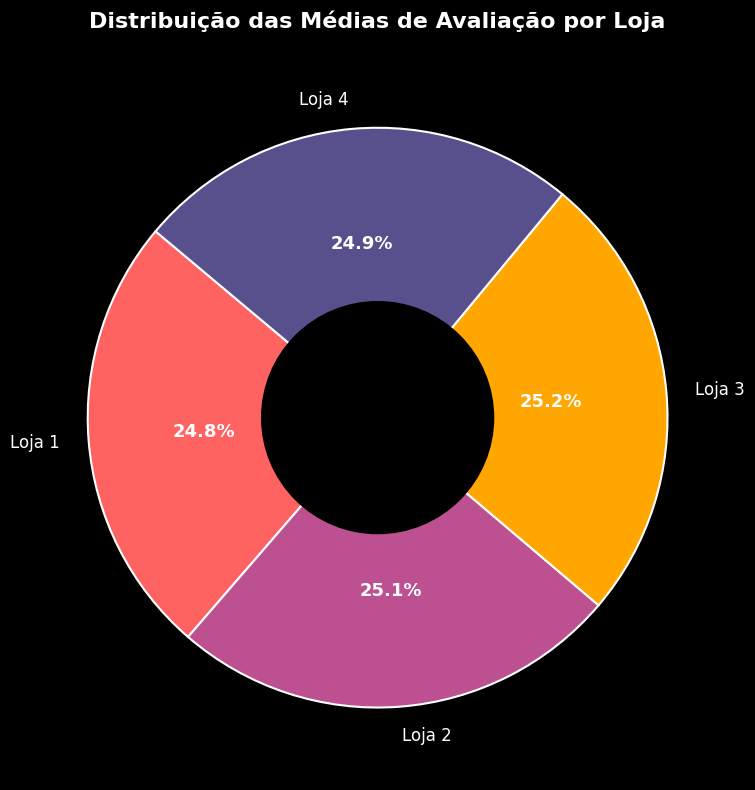

In [ ]:
lojas = avaliacoes.index.tolist()
medias_avaliacao = avaliacoes.values.tolist()
cores = ['#ff6361', '#bc5090', '#ffa600', '#58508d']

# Dark Mode
plt.style.use('dark_background')

# Grafico
fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(medias_avaliacao, labels=lojas, autopct="%1.1f%%", startangle=140, colors=cores,
                                  wedgeprops={'edgecolor': 'white', 'linewidth': 1.5},
                                  textprops={'fontsize': 12, 'color': 'white'})

# Texto dentro do grafico
for autotext in autotexts:
    autotext.set_fontsize(13)
    autotext.set_fontweight("bold")

# Efeito de grafico de rosca
plt.gca().add_patch(plt.Circle((0, 0), 0.4, color='black', fc='black'))

# Titulo
plt.title("Distribuição das Médias de Avaliação por Loja", fontsize=16, fontweight='bold', pad=20)

# Melhora do layout
plt.tight_layout()

plt.show()

# 4. Produtos Mais e Menos Vendidos

In [ ]:
# Verificando se as lojas são DataFrames válidos
lojas = {
    "Loja 1": loja if isinstance(loja, pd.DataFrame) else None,
    "Loja 2": loja2 if isinstance(loja2, pd.DataFrame) else None,
    "Loja 3": loja3 if isinstance(loja3, pd.DataFrame) else None,
    "Loja 4": loja4 if isinstance(loja4, pd.DataFrame) else None,
}

# Removendo lojas inválidas
lojas_validas = {nome: df for nome, df in lojas.items() if df is not None}

# Função para analisar vendas por loja
def analisar_vendas_por_loja(df, nome_loja):
    produtos_vendidos = df.groupby("Produto")["Quantidade de parcelas"].sum().sort_values(ascending=False)

    # Exibindo os 5 produtos mais vendidos
    print(f"\n📈 {nome_loja} - Produtos mais vendidos:")
    print(produtos_vendidos.head(5))

    # Exibindo os 5 produtos menos vendidos
    print(f"\n📉 {nome_loja} - Produtos menos vendidos:")
    print(produtos_vendidos.tail(5))

# Aplicando a função somente às lojas válidas
for nome, df in lojas_validas.items():
    analisar_vendas_por_loja(df, nome)


📈 Loja 1 - Produtos mais vendidos:
Produto
Secadora de roupas    214
TV Led UHD 4K         196
Cômoda                188
Impressora            182
Bicicleta             178
Name: Quantidade de parcelas, dtype: int64

📉 Loja 1 - Produtos menos vendidos:
Produto
Corda de pular    100
Tablet ABXY        99
Dinossauro Rex     94
Mochila            90
Celular ABXY       78
Name: Quantidade de parcelas, dtype: int64

📈 Loja 2 - Produtos mais vendidos:
Produto
Iniciando em programação    223
Celular Plus X42            195
Violão                      183
Micro-ondas                 179
Secadora de roupas          177
Name: Quantidade de parcelas, dtype: int64

📉 Loja 2 - Produtos menos vendidos:
Produto
Poltrona             100
Jogo de tabuleiro     99
Bicicleta             98
Jogo de copos         98
Mesa de jantar        89
Name: Quantidade de parcelas, dtype: int64

📈 Loja 3 - Produtos mais vendidos:
Produto
Bicicleta            191
Fogão                182
Jogo de tabuleiro    181
Corda 

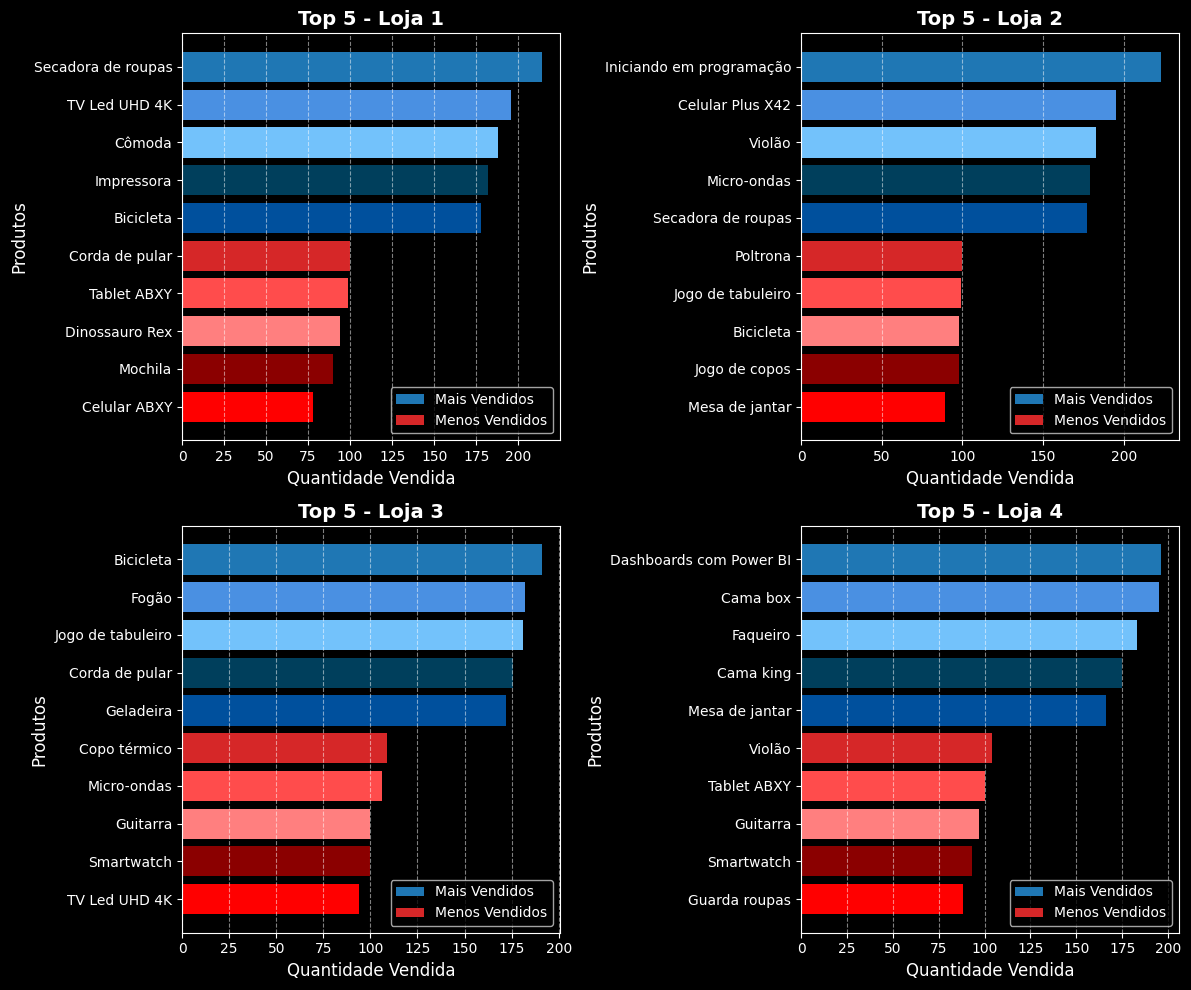

In [ ]:
# Dark mode
plt.style.use("dark_background")

# Grafico
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Lista de lojas
lojas = {"Loja 1": loja, "Loja 2": loja2, "Loja 3": loja3, "Loja 4": loja4}
cores_mais = ['#1f77b4', '#4a90e2', '#73c2fb', '#003f5c', '#00509d']  # Tons de azul para mais vendidos
cores_menos = ['#d62728', '#ff4c4c', '#ff7f7f', '#8b0000', '#ff0000']  # Tons de vermelho para menos vendidos

for ax, (nome, df) in zip(axes.flatten(), lojas.items()):
    produtos_vendidos = df.groupby("Produto")["Quantidade de parcelas"].sum().sort_values(ascending=False) # Agrupando os produtos pela soma das quantidades vendidas

    # Separando os mais e menos vendidos
    mais_vendidos = produtos_vendidos.head(5)
    menos_vendidos = produtos_vendidos.tail(5)

    # Grafico de barras
    ax.barh(mais_vendidos.index, mais_vendidos.values, color=cores_mais, label="Mais Vendidos")
    ax.barh(menos_vendidos.index, menos_vendidos.values, color=cores_menos, label="Menos Vendidos")

    # Mudancas esteticas
    ax.set_title(f"Top 5 - {nome}", fontsize=14, fontweight="bold")
    ax.set_xlabel("Quantidade Vendida", fontsize=12)
    ax.set_ylabel("Produtos", fontsize=12)
    ax.invert_yaxis()  # Destaca os mais vendidos no topo
    ax.grid(axis="x", linestyle="--", alpha=0.5)
    ax.legend(loc="lower right")

# Melhora do layout
plt.tight_layout()

plt.show()

# 5. Frete Médio por Loja


In [ ]:
lojas = {"Loja 1": loja, "Loja 2": loja2, "Loja 3": loja3, "Loja 4": loja4}

# Calculo de frete medio
frete_medio = pd.Series({
    nome: round(dados["Frete"].mean(), 2) if "Frete" in dados.columns else None
    for nome, dados in lojas.items()
})

print("🚚 Frete Médio por Loja:")
print(frete_medio)

🚚 Frete Médio por Loja:
Loja 1    34.69
Loja 2    33.62
Loja 3    33.07
Loja 4    31.28
dtype: float64


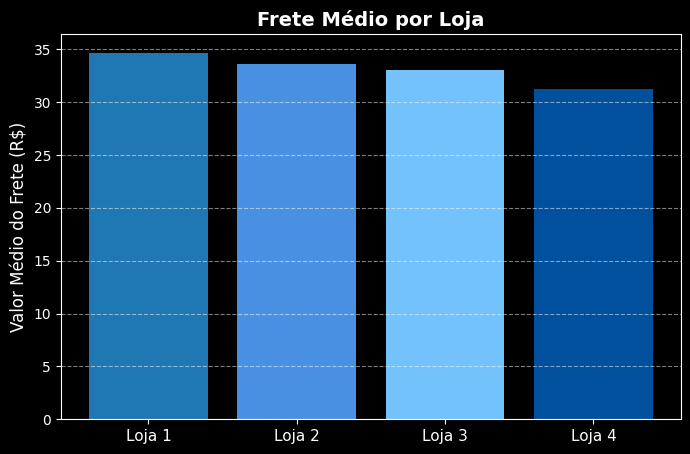

In [ ]:
# Dark mode
plt.style.use("dark_background")

# Grafico
fig, ax = plt.subplots(figsize=(8, 5))
cores = ['#1f77b4', '#4a90e2', '#73c2fb', '#00509d']

# Grafico de barras
ax.bar(frete_medio.index, frete_medio.values, color=cores)

# Mudancas esteticas
ax.set_title("Frete Médio por Loja", fontsize=14, fontweight="bold")
ax.set_ylabel("Valor Médio do Frete (R$)", fontsize=12)
ax.set_xticks(range(len(frete_medio.index)))
ax.set_xticklabels(frete_medio.index, rotation=0, fontsize=11)
ax.grid(axis="y", linestyle="--", alpha=0.5)

plt.show()

# Relatório

Esta análise busca entender o desempenho das lojas do Sr. João, foram avaliadas métricas como: faturamento, avaliação dos clientes, frete médio e vendas. Utilizando cálculos estatísticos e visualizações para identificar padrões e tendências, para fornecer insights dos melhores resultados.

**📊 Análise do Faturamento**

---


A **Loja 1** apresenta o maior faturamento,já a **Loja 4** obteve o menor faturamento.

**🧾 Análise de Vendas por Categoria**

---


A **Loja 1** obteve melhores vendas nas categorias **eletrônicos, eletrodomésticos e esporte/lazer**, já a **Loja 4**, alcançou bons resultados na categoria brinquedos, mas peca nas demais categorias.

**⭐ Análise da Média de Avaliação**

---


A **Loja 3** possui a melhor média de avaliação **(4.05)**, demonstrando um alto nível de satisfação dos clientes. Já a **Loja 1**, possui a menor média **(3.98)**, indicando a necessidade de melhorias, especialmente no atendimento.

**🚚 Análise do Frete por Loja**

---


Podemos observar que apesar de ter o frete mais alto, a **Loja 1** mantém o maior faturamento. Enquanto a **Loja 4**, possuindo o menor custo médio de frete, também apresenta o menor faturamento.

**✍️ Conclusão**

---


Considerando todas as analises feitas, podemos concluir que a **Loja 4** obteve o pior desempenho geral, enfrentando dificuldades de faturamento e baixas vendas na maioria das categorias de produtos. Sendo assim, a escolhida para o fechamento. Notamos
também, que, apesar do maior faturamento, a **Loja 1** apresenta a menor média nas avaliações, demonstrando a necessidade de melhoria